 # C++中用frugally-deep读取keras的.h5模型并进行预测

## 简介

#### frugally-deep 是一个用纯C++写的头文件，只依赖于三个头文件库 FunctionalPlus, Eigen 和 json ，frugally-deep 可以在C++语言中调用keras生成的.h5模型，用opencv或者PIL读取图片进行预测

#### 项目地址 
https://github.com/Dobiasd/frugally-deep
#### 常见问题和使用方法
https://github.com/Dobiasd/frugally-deep/blob/master/FAQ.md

## 安装配置
- 注：配置过程看起来很长但是关键的操作没多少，力求详细对初学者比较友好。

#### 1.在github上下载https://github.com/Dobiasd/frugally-deep 项目，解压
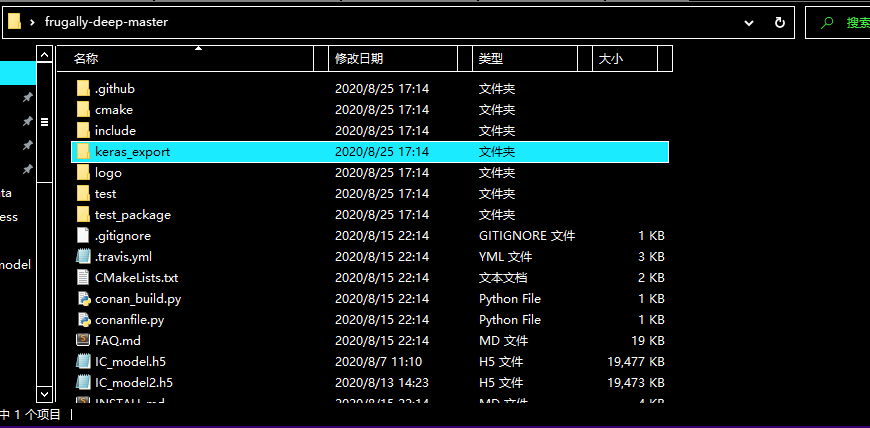
- 下载三个依赖头文件解压
  - FunctionalPlus https://github.com/Dobiasd/FunctionalPlus
  - Eigen http://eigen.tuxfamily.org/
  - json https://github.com/nlohmann/json

 #### 2. 用vs创建一个空共项目
 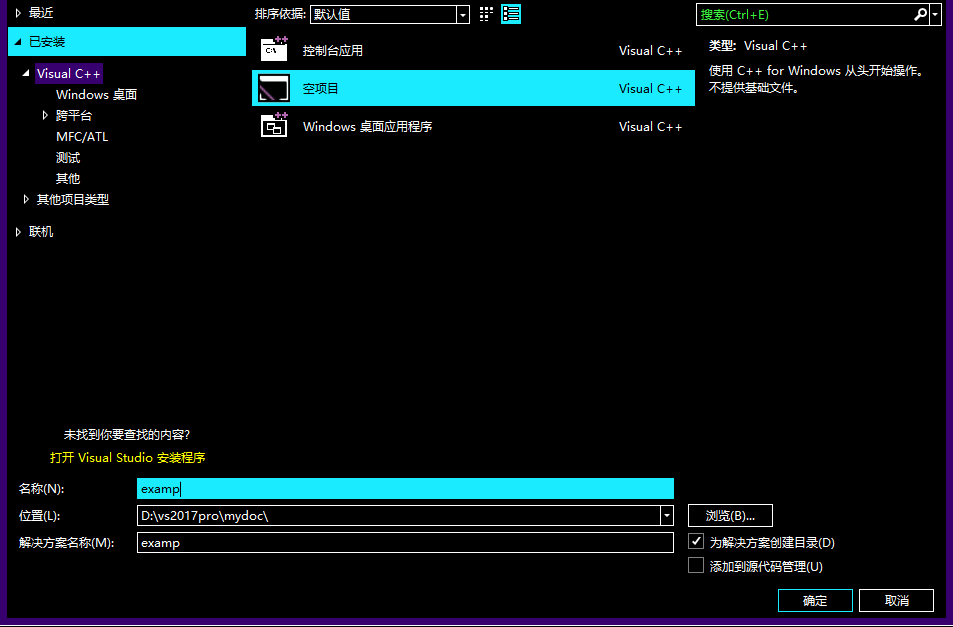
 

#### 3. 把FunctionalPlus, Eigen 和 json的头文件库下载下来解压，将对应文件放入一个include文件夹中
所需文件的路径看截图的路径框
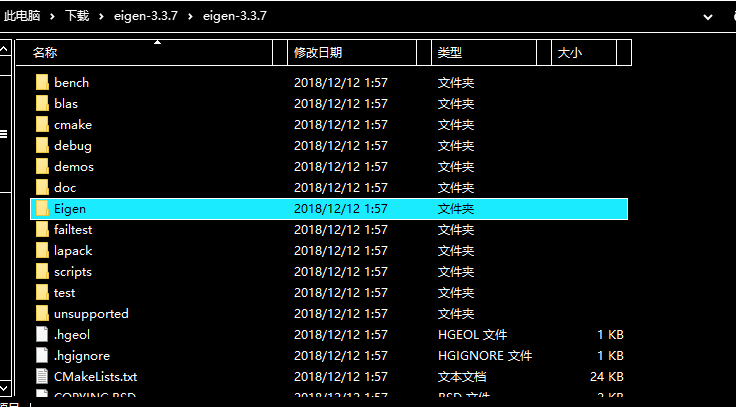

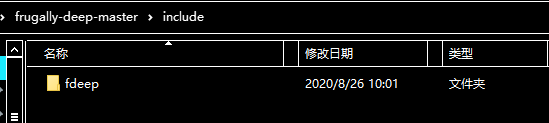

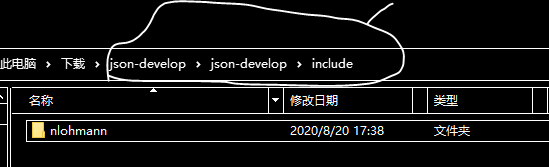

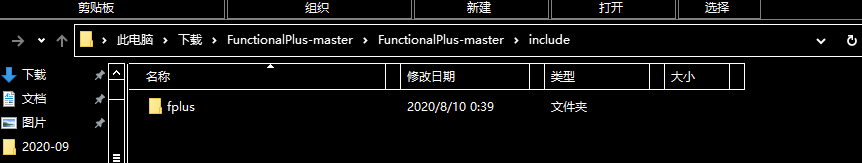

- opencv不想每次都重新配置的话也可以在此一次性配置，方法如下
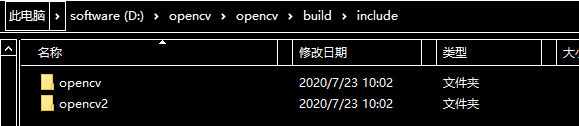
- 把这两个文件夹拷贝到include文件夹

##  最终的include文件夹
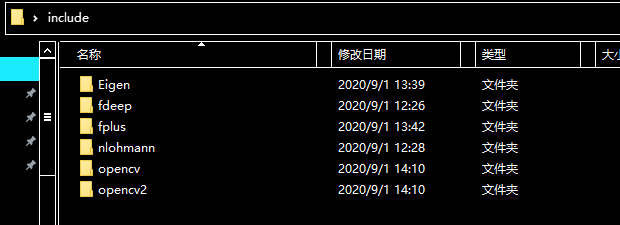

- 把include文件夹移入项目（推荐与load_model.props配置表同级）
 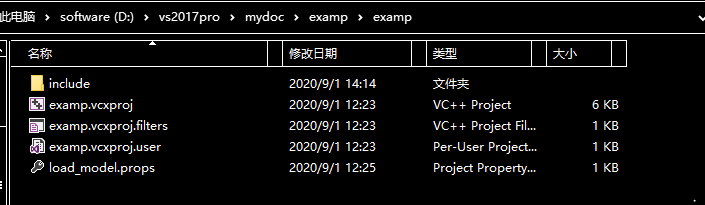

- opencv的lib文件，opencv的两个DLL文件拷贝到项目中
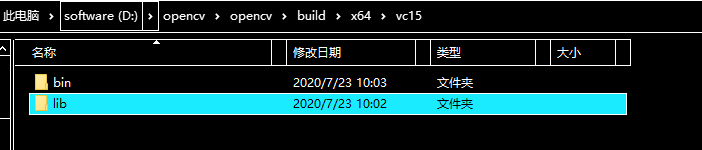

- opencv的两个DLL文件
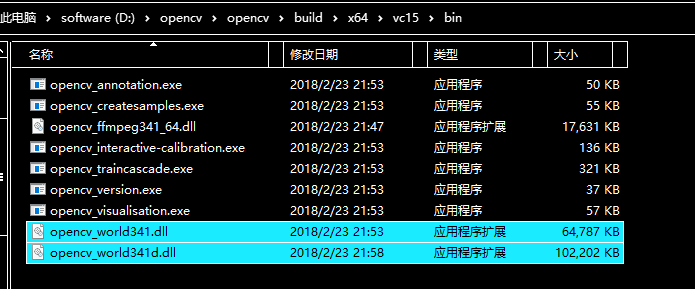

## 最终的项目文件夹如下
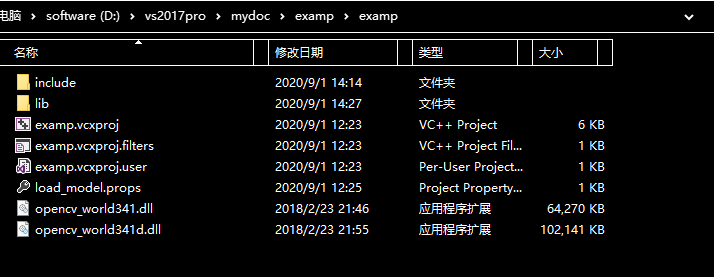

#### 4. 新建一个属性表（以后新建项目直接拖进去就不用重新配置了）
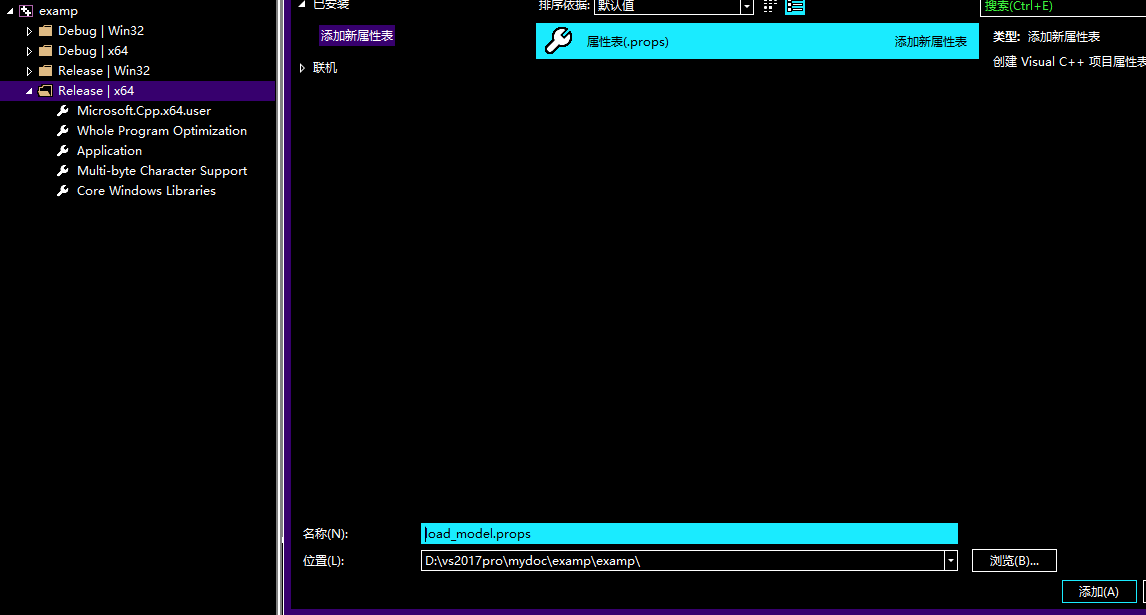


- 配置包含目录和库目录
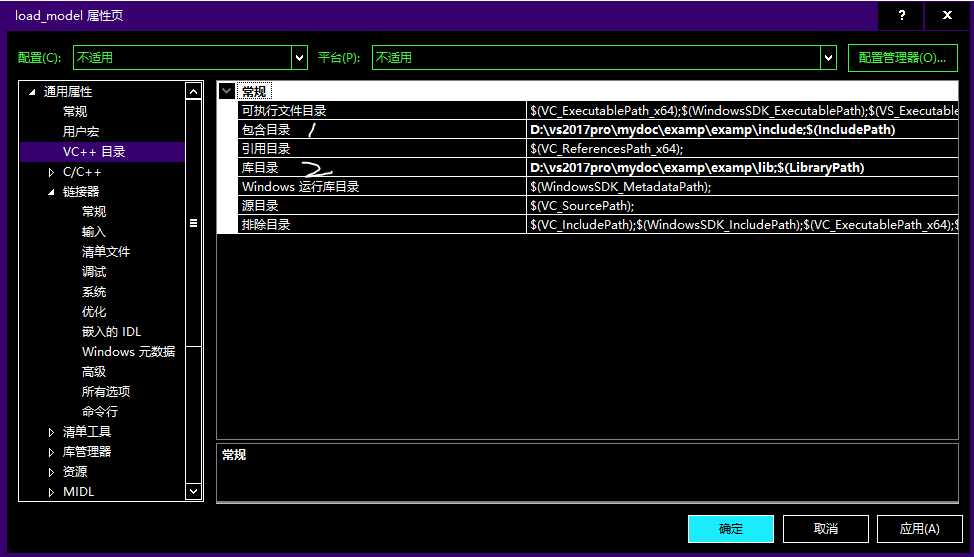

- 配置连接器的附加依赖项
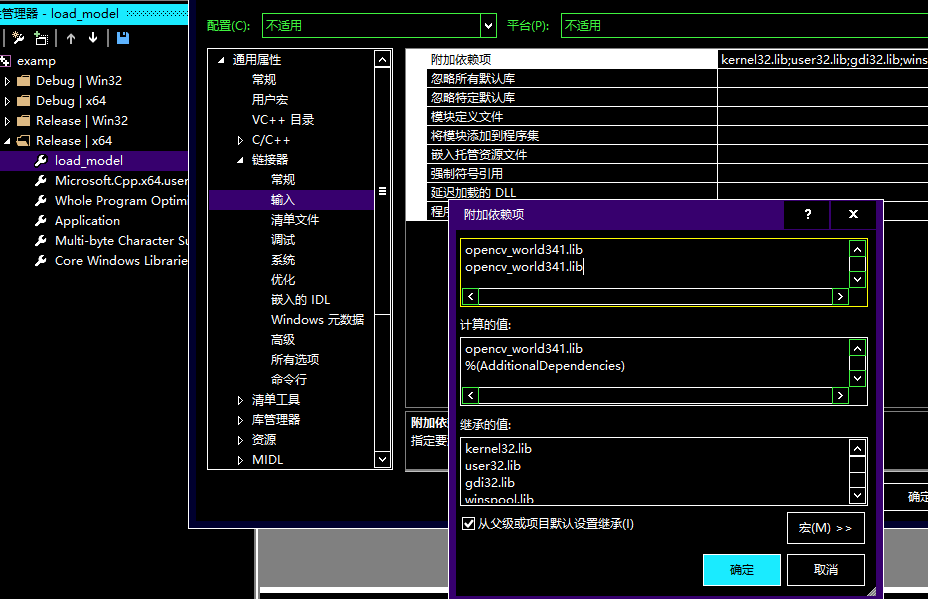

## 5. 创建源文件读取图像并预测

- cpp源文件
```c++

 #include <fdeep/fdeep.hpp>
 #include <cstdlib>

 #include<opencv2/opencv.hpp>
 #include <opencv2/imgproc/imgproc.hpp>

 #include"time.h"

    int main()
    {
        const char a[62] = { '0','1','2','3','4','5','6','7','8','9',
            'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
            'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z' };
        const auto model = fdeep::load_model("mymodel.json");
        cv::Mat image = cv::imread("1.bmp");

        cv::Size dsize = cv::Size(35, 75);
        cv::resize(image, image, dsize, 0, 0, cv::INTER_NEAREST);

        cv::imshow("img", image);
        cv::waitKey(0);

        const auto input = fdeep::tensor_from_bytes(image.ptr(),
            static_cast<std::size_t>(image.rows),
            static_cast<std::size_t>(image.cols),
            static_cast<std::size_t>(image.channels()),
            0.0f, 1.0f);
        const auto pre_class = model.predict_class({ input });
        std::cout << a[pre_class];

    }
```


- 把模型.json文件和图片放入项目（由.h5生成.json文件见附录）
## 最终项目结构
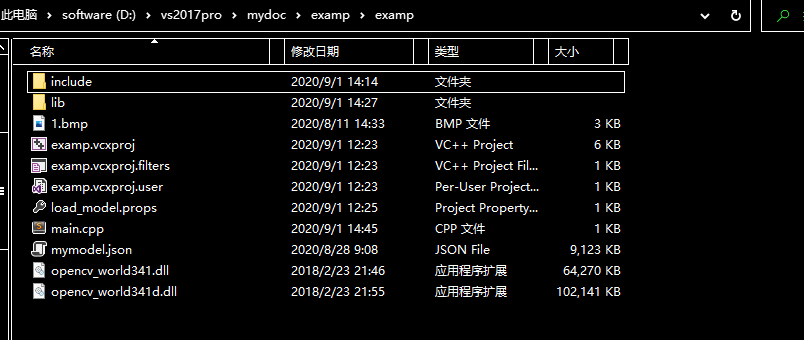

###  在vs中运行
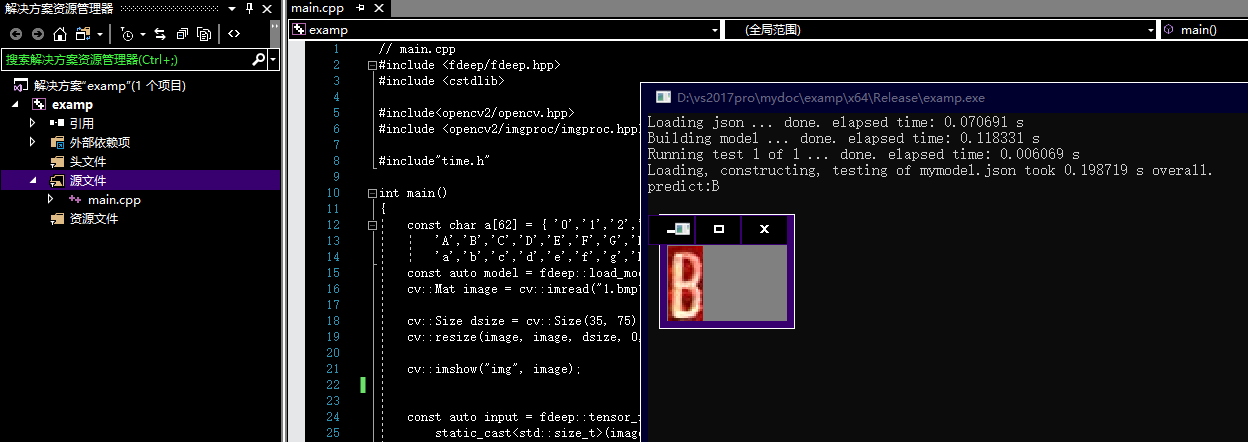

#            完美！！！有没有！！！

# 附录
###  .h5转为 .json模型
- 在下载下来的fdeep文件中有这样一个文件夹
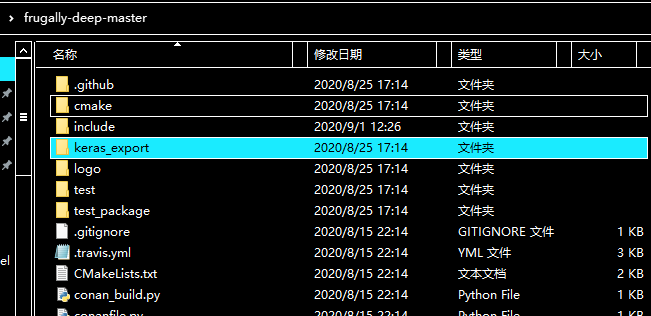

- 把keras生成的模型放入这里，打开cmd或者pawershell（shift+右键）输入
```python
python keras_export/convert_model.py mymodel.h5 mymodel.json
```